Text(0, 0.5, 'Alpha rotation (degrees)')

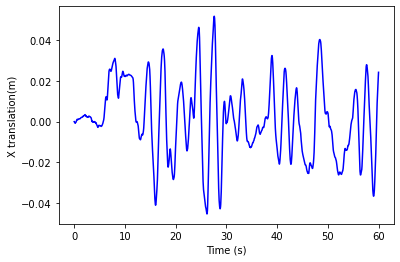

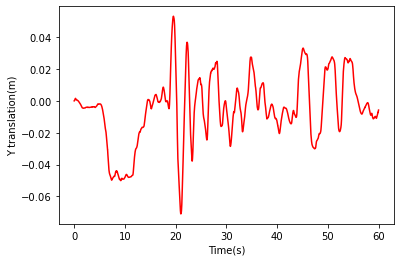

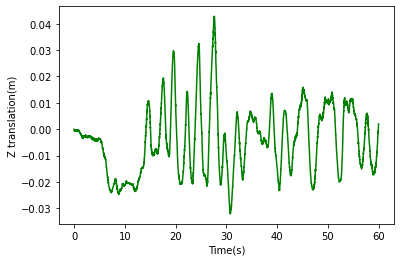

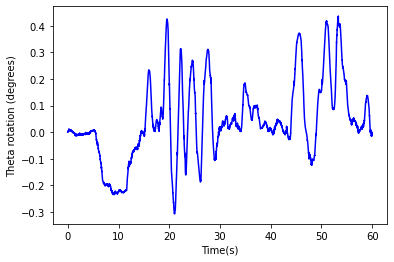

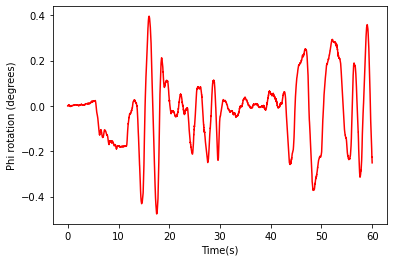

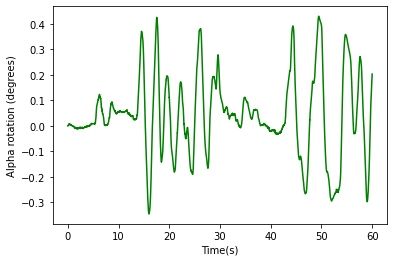

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

!pip install moviepy
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage


#plotting time series of all coordinates to determine period of most head movement
time = np.linspace(0,60,7200)




x_time_data = np.loadtxt('x_trans.mat')
plt.plot(time,x_time_data, color='blue')
plt.xlabel("Time (s)")
plt.ylabel("X translation(m)")
plt.figure()

y_time_data = np.loadtxt('y_trans.mat')
plt.plot(time,y_time_data,color='red')
plt.xlabel("Time(s)")
plt.ylabel("Y translation(m)")
plt.figure()

z_time_data = np.loadtxt('z_trans.mat')

plt.plot(time,z_time_data,color='green')
plt.xlabel("Time(s)")
plt.ylabel("Z translation(m)")
plt.figure()

theta_time_data = np.loadtxt('theta.mat')

plt.plot(time,theta_time_data,color='blue')
plt.xlabel("Time(s)")
plt.ylabel("Theta rotation (degrees)")
plt.figure()

phi_time_data = np.loadtxt('phi.mat')

plt.plot(time,phi_time_data,color='red')
plt.xlabel("Time(s)")
plt.ylabel("Phi rotation (degrees)")
plt.figure()

alpha_time_data = np.loadtxt('alpha.mat')

plt.plot(time,alpha_time_data,color='green')
plt.xlabel("Time(s)")
plt.ylabel("Alpha rotation (degrees)")

1200


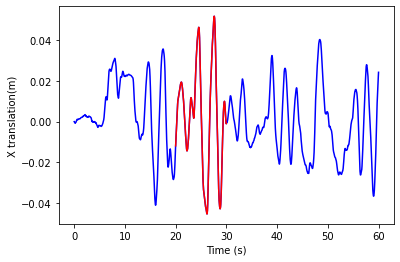

<Figure size 432x288 with 0 Axes>

In [3]:
#From time series plot the most visible head movement appears to be between 20 - 30seconds,
#,so data points 2400 - 3600 as 120hz means 120 data points a second
time_movie = time[2400:3600]
x_movie_data = x_time_data[2400:3600]


#check to see whether arrays have been sliced correctly 
print(len(x_movie_data))
plt.plot(time,x_time_data, color='blue')
plt.plot(time_movie,x_movie_data, color='red')
plt.xlabel("Time (s)")
plt.ylabel("X translation(m)")
plt.figure()


y_movie_data = y_time_data[2400:3600]
z_movie_data = z_time_data[2400:3600]
theta_movie_data = theta_time_data[2400:3600]
phi_movie_data = phi_time_data[2400:3600]
alpha_movie_data = alpha_time_data[2400:3600]

(50, 3)


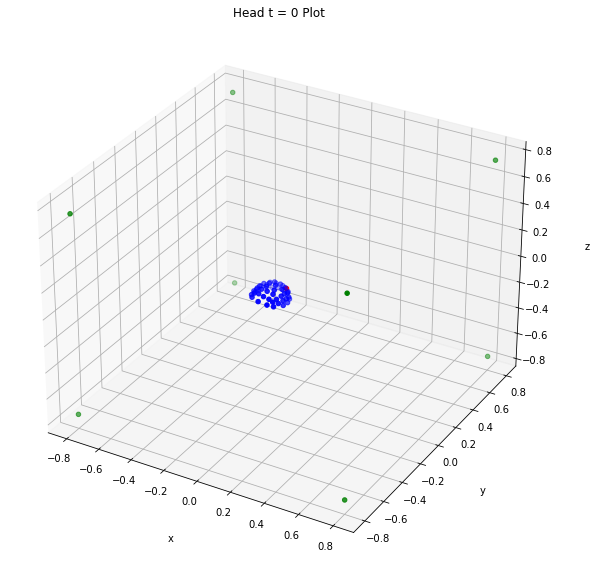

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Locating the position of the head with respect to the room at time t=0 (t0)
room_corners = np.loadtxt('room_corners.mat')
head_t0 = np.loadtxt('head.mat')

print(head_t0.shape)
x_head = head_t0[0:50,0]
y_head = head_t0[0:50,1]
z_head = head_t0[0:50,2]

x_room = room_corners[0:8,0]
y_room = room_corners[0:8,1]
z_room = room_corners[0:8,2]


#Plotting the postition of the head at t0 relative to corners of room (green) and origin (red)
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

ax.scatter(0,0,0, c = 'r')
ax.scatter(x_room , y_room , z_room , c = 'g')
ax.scatter(x_head, y_head, z_head, c = 'b')
ax.set_title('Head t = 0 Plot')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

plt.show()



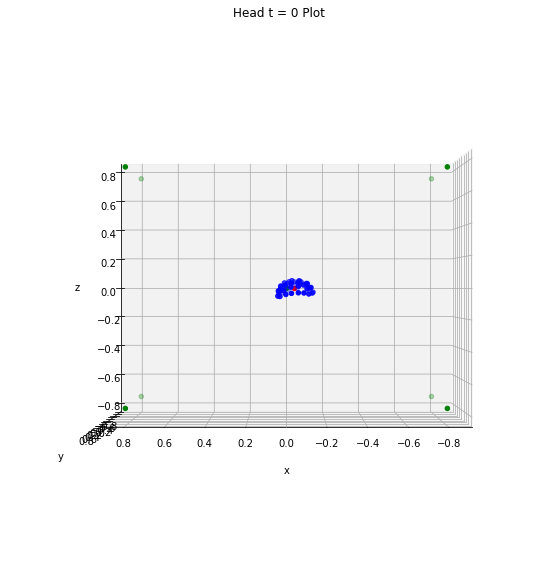

In [6]:
#Calculating and plotting the centre of mass (COM) of the head

def Average(lst): 
    return sum(lst) / len(lst) 

COM = Average(x_head), Average(y_head), Average(z_head)


fig = plt.figure(figsize = (10,10))
ax1 = plt.axes(projection='3d')
ax1.grid()
COM_x = COM[0]
COM_y = COM[1]
COM_z = COM[2]
#Red dot in plot is now the COM rather than the origin

ax1.scatter(COM_x, COM_y, COM_z, c = 'r')
ax1.scatter(x_head, y_head, z_head, c = 'b')
ax1.scatter(x_room , y_room , z_room , c = 'g')
ax1.set_title('Head t = 0 Plot')

# Set axes label
ax1.set_xlabel('x', labelpad=20)
ax1.set_ylabel('y', labelpad=20)
ax1.set_zlabel('z', labelpad=20)
ax1.view_init(elev=0., azim=90) #fixes the view of the plot to be 'facing' the xz plane


plt.show()


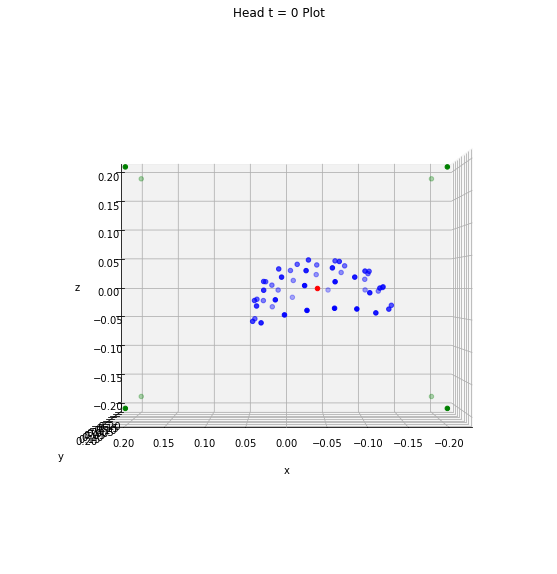

In [7]:
#Zooming in on head by 'shrinking' the corners of the plot
x_room_shift = x_room/4
y_room_shift = y_room/4
z_room_shift = z_room/4




fig = plt.figure(figsize = (10,10))
ax2 = plt.axes(projection='3d')
ax2.grid()

ax2.scatter(COM_x, COM_y, COM_z, c = 'r')
ax2.scatter(x_head, y_head, z_head, c = 'b')
ax2.scatter(x_room_shift , y_room_shift , z_room_shift , c = 'g')
ax2.set_title('Head t = 0 Plot')

# Set axes label
ax2.set_xlabel('x', labelpad=20)
ax2.set_ylabel('y', labelpad=20)
ax2.set_zlabel('z', labelpad=20)
ax2.view_init(elev=0., azim=90)

plt.show()

-0.040999187252000004 -0.08066797129000002 -0.00040074417799999926
-0.040999187252000004 -0.08066797129000002 -0.00040074417799999926
[-0.75900081  0.84099919 -0.75900081  0.84099919 -0.75900081  0.84099919
 -0.75900081  0.84099919] [ 0.88066797  0.88066797 -0.71933203 -0.71933203  0.88066797  0.88066797
 -0.71933203 -0.71933203] [-0.74959926 -0.74959926 -0.74959926 -0.74959926  0.75040074  0.75040074
  0.75040074  0.75040074]


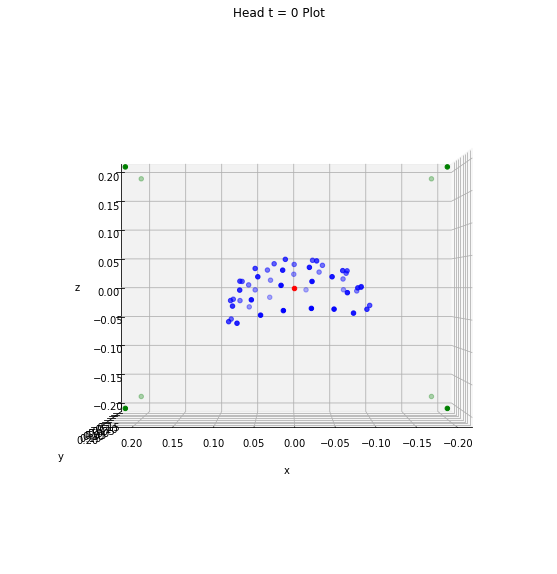

In [9]:
#centering the room on the COM
print(COM_x, COM_y, COM_z)

#Translating the whole head so that the COM is at the origin of the reference frame     
x_head_shift = x_head - COM_x
y_head_shift = y_head - COM_y
z_head_shift = z_head - COM_z

    
print(COM_x, COM_y, COM_z)
x_room_shift = x_room - COM_x
y_room_shift = y_room - COM_y
z_room_shift = z_room - COM_z

print(x_room_shift,y_room_shift, z_room_shift)

x_room_shift = x_room_shift/4
y_room_shift = y_room_shift/4
z_room_shift = z_room_shift/4




fig = plt.figure(figsize = (10,10))
ax3 = plt.axes(projection='3d')
ax3.grid()

ax3.scatter(0, 0, 0, c = 'r')
ax3.scatter(x_head_shift, y_head_shift, z_head_shift, c = 'b')
ax3.scatter(x_room_shift , y_room_shift , z_room_shift , c = 'g')
ax3.set_title('Head t = 0 Plot')

# Set axes label
ax3.set_xlabel('x', labelpad=20)
ax3.set_ylabel('y', labelpad=20)
ax3.set_zlabel('z', labelpad=20)
ax3.view_init(elev=0., azim=90)

plt.show()

In [10]:
#Creating translation and rotation matrices 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


Matrix = np.zeros([4,4])
Matrix1 = np.zeros([4,4])
Matrix2 = np.zeros([4,4])
Matrix3 = np.zeros([4,4])

def Matrix_translation(delta_x, delta_y, delta_z, Matrix):
    delta = [delta_x,delta_y,delta_z]
    
    for i in range(4):
        for j in range(4):
            if i == j:
                Matrix[i,j] = 1
            elif j == 3:
                Matrix[i,j] = delta[i]
                
    return Matrix


 
def Matrix_rotation_theta(delta_theta, Matrix1):
    
    
    for i in range(4):
        for j in range(4):
            if i == j:
                Matrix1[i,j] = 1
    Matrix1[1,1] = np.round(np.cos(delta_theta),3)
    Matrix1[1,2] = np.round(np.sin(delta_theta),3)
    Matrix1[2,1] = np.round(-np.sin(delta_theta),3)
    Matrix1[2,2] = np.round(np.cos(delta_theta),3)
    
    return Matrix1
    


def Matrix_rotation_phi(delta_phi, Matrix2):
    
    
    for i in range(4):
        for j in range(4):
            if i == j:
                Matrix2[i,j] = 1
    Matrix2[0,0] = np.round(np.cos(delta_phi),3)
    Matrix2[0,2] = np.round(-np.sin(delta_phi),3)
    Matrix2[2,0] = np.round(np.sin(delta_phi),3)
    Matrix2[2,2] = np.round(np.cos(delta_phi),3)
    
    return Matrix2


def Matrix_rotation_alpha(delta_alpha, Matrix3):
    
    
    for i in range(4):
        for j in range(4):
            if i == j:
                Matrix3[i,j] = 1
    Matrix3[0,0] = np.round(np.cos(delta_alpha),3)
    Matrix3[0,1] = np.round(-np.sin(delta_alpha),3)
    Matrix3[1,0] = np.round(np.sin(delta_alpha),3)
    Matrix3[1,1] = np.round(np.cos(delta_alpha),3)
    
    return Matrix3




In [11]:
#Creating an array containing 50 4D vectors, one for every head point
head_shift = np.zeros([50,3])
head_shift[:,0] = x_head_shift
head_shift[:,1] = y_head_shift
head_shift[:,2] = z_head_shift

fourD_array = np.zeros([50,4])
print(fourD_array.shape)
for i in range(fourD_array.shape[0]):
    for j in range(fourD_array.shape[1]):
        if j < 3:
            fourD_array[i,j] = head_shift[i,j]
        else:
            fourD_array[i,j] = 1


new_fourD_array = np.zeros([50,4])
img = [] # some array of images
frames = [] #for storing the generated images
a = len(y_movie_data)
print(a)
t = 20
for j in range(1200):
    new_fourD_array = np.zeros([50,4])
    
    t += 1/120
    fifty_counter = j %50   #helps user keep track of how far the code is from completion 
    if fifty_counter == 0:            
        print(t)
    
    for i in range(fourD_array.shape[0]):
        
        new_fourD_array[i,:] = np.matmul(Matrix_rotation_phi(phi_movie_data[j], Matrix2), fourD_array[i,:])
        new_fourD_array[i,:] = np.matmul(Matrix_rotation_theta(theta_movie_data[j], Matrix1), new_fourD_array[i,:])
        new_fourD_array[i,:] = np.matmul(Matrix_rotation_alpha(alpha_movie_data[j],Matrix3), new_fourD_array[i,:])
        new_fourD_array[i,:] = np.matmul(Matrix_translation(x_movie_data[j], y_movie_data[j], z_movie_data[j], Matrix), new_fourD_array[i,:])
        
    #recalculates the centre of mass to see how far it shifts each frame 
    COM_new = Average(new_fourD_array[:,0]), new_fourD_array[:,1], Average(new_fourD_array[:,2]) 
    
    fig = plt.figure(figsize = (10,10))
    ax5 = plt.axes(projection='3d')
    ax5.grid()

    ax5.scatter3D(0, 0, 0, c = 'g')
    ax5.scatter3D(COM_new[0],COM_new[1],COM_new[2], c = 'r')
    ax5.scatter3D(new_fourD_array[:,0], new_fourD_array[:,1], new_fourD_array[:,2], c = 'b')
    ax5.scatter3D(x_room_shift , y_room_shift , z_room_shift , c = 'g')
    ax5.set_title('Head t = 0 Plot')

    # Set axes label
    ax5.set_xlabel('x', labelpad=20)
    ax5.set_ylabel('y', labelpad=20)
    ax5.set_zlabel('z', labelpad=20)
    ax5.view_init(elev=0., azim=90)
    
    # Save the frame
    plt.savefig((f'frame_{j:04d}.png')) #ensures that frames are saved in the correct order
    plt.close(fig)  # Close the figure to save memory
    

  



(50, 4)
1200
20.008333333333333
20.424999999999976
20.84166666666662
21.258333333333262
21.674999999999905
22.091666666666548
22.50833333333319
22.924999999999834
23.341666666666477
23.75833333333312
24.174999999999763
24.591666666666406
25.00833333333305
25.42499999999969
25.841666666666335
26.258333333332978
26.67499999999962
27.091666666666264
27.508333333332907
27.92499999999955
28.341666666666192
28.758333333332835
29.17499999999948
29.59166666666612


In [12]:
#Loading the saved frames into an animation of the head movement 
import imageio
import os

frame_dir = './'  # Directory where the frames are saved
video_filename = 'animation_120fps.mp4'  # Name of the output video file

# List all saved frame files
frame_files = [f for f in os.listdir(frame_dir) if f.endswith('.png')]
frame_files.sort()  # Sort to maintain the correct order

# Creating video writer
with imageio.get_writer(video_filename, fps=120) as writer:
    for frame_file in frame_files:
        frame_path = os.path.join(frame_dir, frame_file)
        image = imageio.imread(frame_path)
        writer.append_data(image)

print(f"Video saved as {video_filename}")

Video saved as animation_120fps.mp4
